## Homework - Machine Learning Preparation
# DO NOT EDIT DIRECTLY, DOWNLOAD AND EDIT THE DOWNLOADED FILE



**Product Classification**<br>
**Deskripsi**<br>
* Memprediksi apakah suatu produk eksklusif atau tidak berdasarkan fitur yang tersedia<br>


In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
pip install pyspark

In [4]:
!pip install findspark

In [5]:
import findspark
findspark.init()
findspark.find()

'/usr/local/lib/python3.10/dist-packages/pyspark'

In [6]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.26.4
pandas version :  2.2.2
seaborn version :  0.13.2


In [7]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

# Load and Describe Data

## Load Data

In [8]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
airports = spark.read.csv("/content/drive/MyDrive/Big data 1/Product_Exclusive_Classification.csv",

header=True, inferSchema=True)


## 1. Descriptive Statistics (5 poin)

In [9]:
# Import library yang dibutuhkan
import pandas as pd

# Membaca file CSV yang diunggah
df = pd.read_csv('/content/drive/MyDrive/Big data 1/Product_Exclusive_Classification.csv')

# Menampilkan informasi dasar tentang data
df.info()

# Menampilkan statistik deskriptif tentang data
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8000 non-null   int64  
 1   brand              8000 non-null   object 
 2   category           7987 non-null   object 
 3   rating             7905 non-null   float64
 4   number_of_reviews  7991 non-null   float64
 5   love               7966 non-null   float64
 6   price              7992 non-null   float64
 7   value_price        7983 non-null   float64
 8   exclusive          8000 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 562.6+ KB


,id,brand,category,rating,number_of_reviews,love,price,value_price,exclusive
count,8.000000e+03,8000,7987,7905.000000,7991.000000,7.966000e+03,7992.000000,7983.000000,8000.000000
unique,NaN,310,142,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,SEPHORA COLLECTION,Perfume,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,492,619,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.910231e+06,NaN,NaN,4.085136,303.574396,1.756396e+04,49.900935,50.983300,0.255875
std,3.858353e+05,NaN,NaN,0.761069,931.724460,4.425339e+04,46.864764,48.473049,0.436379
min,5.000000e+01,NaN,NaN,0.000000,0.000000,0.000000e+00,2.000000,2.000000,0.000000
25%,1.773379e+06,NaN,NaN,4.000000,14.000000,2.000000e+03,24.000000,24.000000,0.000000
50%,2.030360e+06,NaN,NaN,4.000000,56.000000,5.500000e+03,35.000000,35.000000,0.000000
75%,2.185074e+06,NaN,NaN,4.500000,231.500000,1.530000e+04,59.000000,60.000000,1.000000


#A. Kesesuaian Tipe Data:

Semua tipe data terlihat sudah sesuai. Kolom brand dan category memiliki tipe data object yang sesuai dengan isinya (teks). Tidak ada kolom yang berisi angka namun bertipe object.

#B. Kolom dengan Nilai Kosong:

Beberapa kolom memiliki nilai kosong (null):
category memiliki 23 nilai kosong.
rating memiliki 95 nilai kosong.
number_of_reviews memiliki 9 nilai kosong.
love memiliki 34 nilai kosong.
price memiliki 8 nilai kosong.
value_price memiliki 17 nilai kosong.

#C. Kolom yang memiliki Nilai Summary Agak Aneh

#id:

Tidak ada masalah, nilai id bervariasi secara unik sebagai penanda setiap baris, dengan tidak ada nilai summary yang mencurigakan.

#brand:

Tidak ada masalah, kolom brand memiliki 310 nilai unik, dengan brand SEPHORA COLLECTION sebagai yang paling sering muncul (freq = 492). Ini masuk akal jika dataset mencakup berbagai merek.

#category:

Tidak ada masalah yang jelas, meskipun kolom ini memiliki 142 kategori unik, yang dapat diharapkan dari berbagai produk kecantikan.
Nilai top adalah Perfume dengan frekuensi 619, yang dapat dianggap normal jika parfum adalah kategori yang dominan.

#rating:

mean rating adalah 4.08, yang masuk akal untuk produk dengan ulasan cenderung positif.
Nilai min adalah 0, yang mungkin aneh jika seharusnya rating berkisar antara 1 hingga 5, ini bisa jadi kesalahan input atau produk yang belum mendapat rating.

#number_of_reviews:

min adalah 0, yang bisa terjadi jika ada produk yang belum memiliki ulasan.
max adalah 19,000, yang mungkin agak tinggi tetapi mungkin valid untuk produk yang sangat populer.
Tidak ada masalah signifikan selain min = 0, yang mungkin perlu pengecekan lebih lanjut.

#love:

max adalah 1,300,000, yang tampak sangat tinggi dibandingkan dengan mean sekitar 17,563 dan median 2,000. Ini mungkin indikasi outlier atau produk yang sangat populer.
Perbedaan yang signifikan antara mean dan median menunjukkan distribusi yang sangat miring, mungkin karena beberapa produk memiliki jumlah “love” yang jauh lebih tinggi dari yang lain.

#price:

min adalah 2, yang cukup rendah untuk produk kecantikan.
max adalah 549, yang bisa masuk akal untuk produk mewah atau kit yang lebih besar, tetapi dapat dianggap sebagai outlier tergantung pada jenis produk.

#value_price:

Nilai max adalah 549, yang sama dengan kolom price. Ini masuk akal jika value_price digunakan untuk menunjukkan nilai produk sebelum diskon atau sebagai perbandingan nilai.
min adalah 2, sama seperti kolom price, yang tidak tampak aneh karena mungkin beberapa produk memang berharga rendah.

#exclusive:

Kolom ini memiliki nilai rata-rata 0.256 dan terdiri dari nilai 0 dan 1 saja, dengan 1 sebagai penanda eksklusifitas. Tidak ada masalah karena nilai ini sepertinya biner dan konsisten.

#Kesimpulan:

Nilai yang tampak agak aneh adalah pada kolom rating (nilai min = 0 yang mungkin kesalahan), number_of_reviews (nilai max = 19000, yang bisa menjadi outlier tetapi mungkin valid), dan love (dengan max = 1,300,000 yang tampak sangat tinggi dan mungkin merupakan outlier).

# Exploratory Data Analysis (EDA)

## Pendekatan Numerik

In [10]:
import pandas as pd

# Membaca file CSV
df = pd.read_csv('/content/drive/MyDrive/Big data 1/Product_Exclusive_Classification.csv')

# Menghitung mode untuk kolom 'brand' dan 'category'
brand_mode = df['brand'].mode()[0]
category_mode = df['category'].mode()[0]
print("Brand Mode:", brand_mode)
print("Category Mode:", category_mode)

# Menghitung distribusi frekuensi untuk kolom 'brand' dan 'category'
brand_freq = df['brand'].value_counts()
category_freq = df['category'].value_counts()
print("\nBrand Frequency:\n", brand_freq)
print("\nCategory Frequency:\n", category_freq)

# Menghitung skewness untuk kolom numerik
numeric_df = df.select_dtypes(include=['number'])
skewness = numeric_df.skew()
print("\nSkewness for Numeric Columns:\n", skewness)

# Menghitung kuartil dan rentang untuk melihat potensi bimodalitas
summary = df.describe()
print(summary)

# Mendeteksi outlier untuk setiap kolom numerik menggunakan IQR
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
# Changed df to numeric_df in the outlier calculation to ensure alignment
outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).sum()
print("Jumlah outlier pada setiap kolom:\n", outliers)

for col in df.select_dtypes(include='object').columns:
    unique_counts = df[col].nunique()
    print(f"Unique categories in {col}: {unique_counts}")




Brand Mode: SEPHORA COLLECTION
Category Mode: Perfume

Brand Frequency:
 brand
SEPHORA COLLECTION    492
CLINIQUE              211
TOM FORD              150
tarte                 143
Kiehl's Since 1851    122
                     ... 
Conture                 1
Cocofloss               1
Makeup Eraser           1
Flora + Bast            1
SHHHOWERCAP             1
Name: count, Length: 310, dtype: int64

Category Frequency:
 category
Perfume                  619
Moisturizers             395
Face Serums              334
Value & Gift Sets        241
Face Wash & Cleansers    225
                        ... 
Powder Brush               1
Accessories                1
Lid Shadow Brush           1
Spa Tools                  1
Cleansing Brushes          1
Name: count, Length: 142, dtype: int64

Skewness for Numeric Columns:
 id                  -2.032456
rating              -3.003113
number_of_reviews    9.506574
love                 9.511595
price                3.145644
value_price          3.17

## Pendekatan Grafis

### Univariate Analysis (10 Poin)

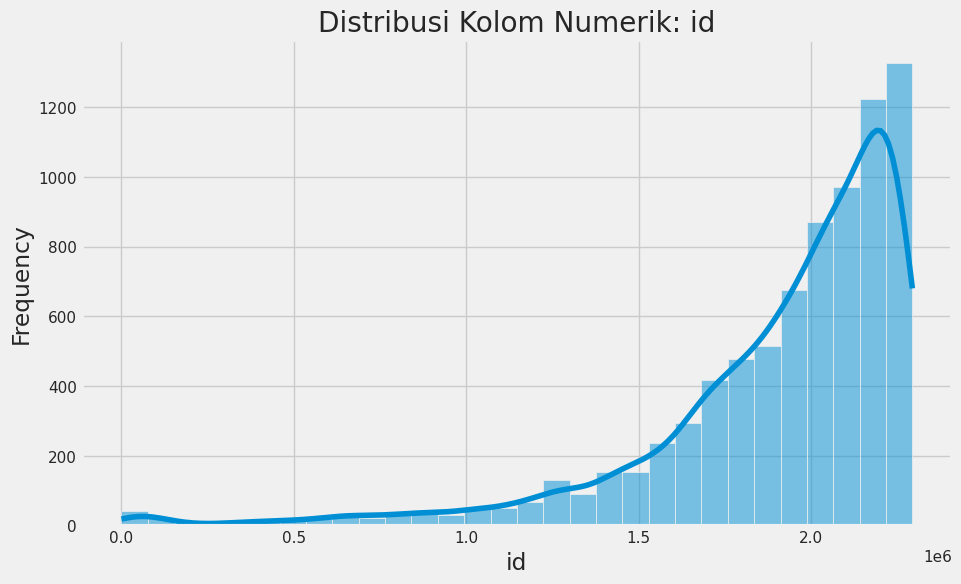

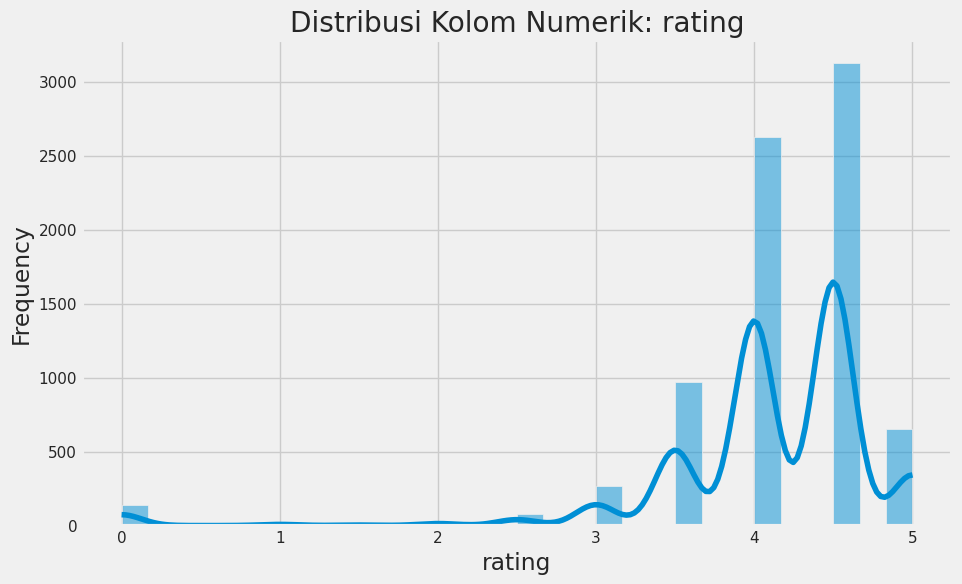

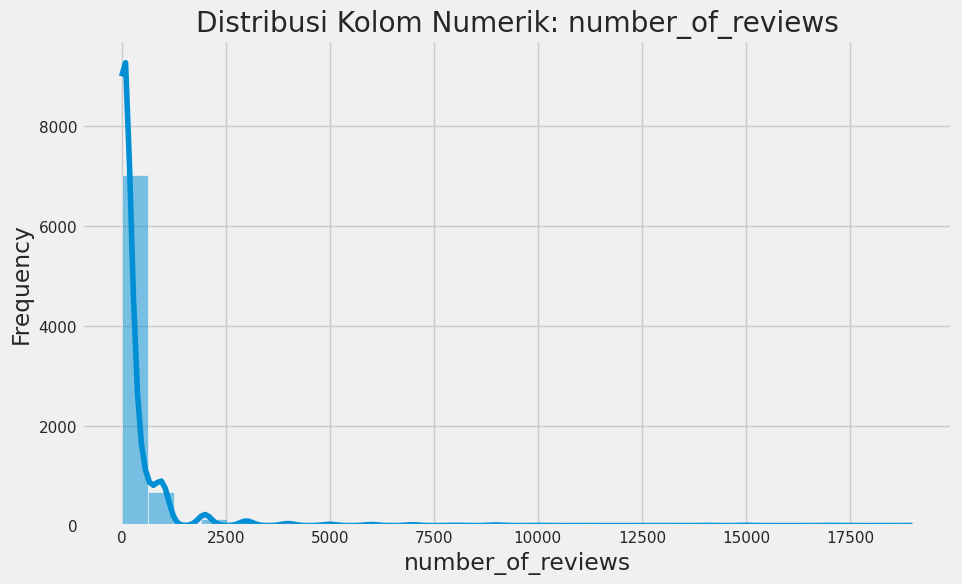

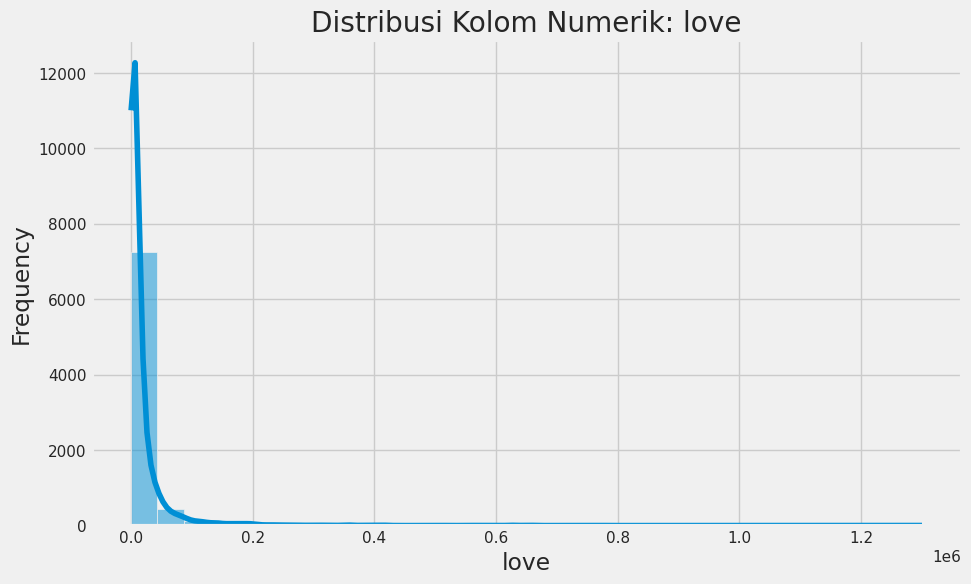

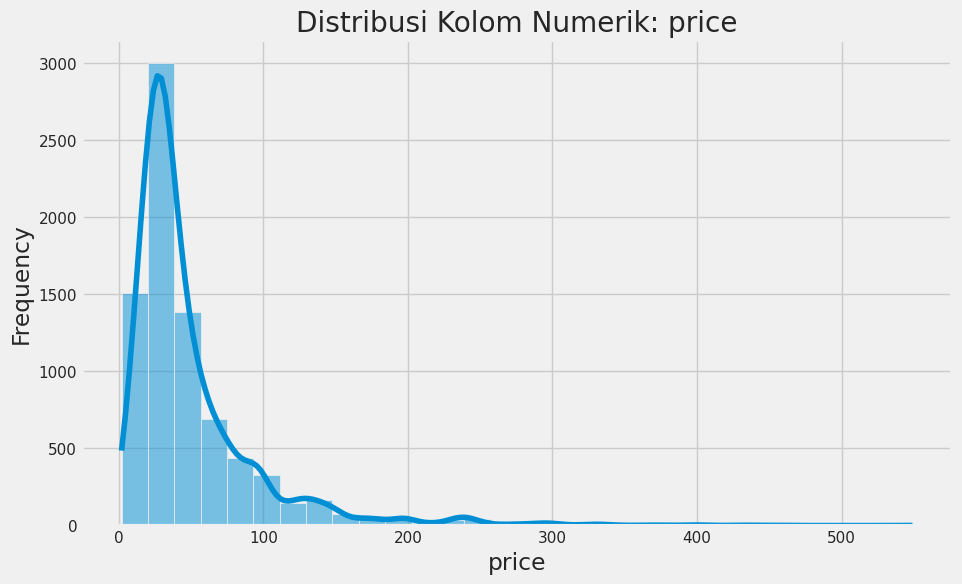

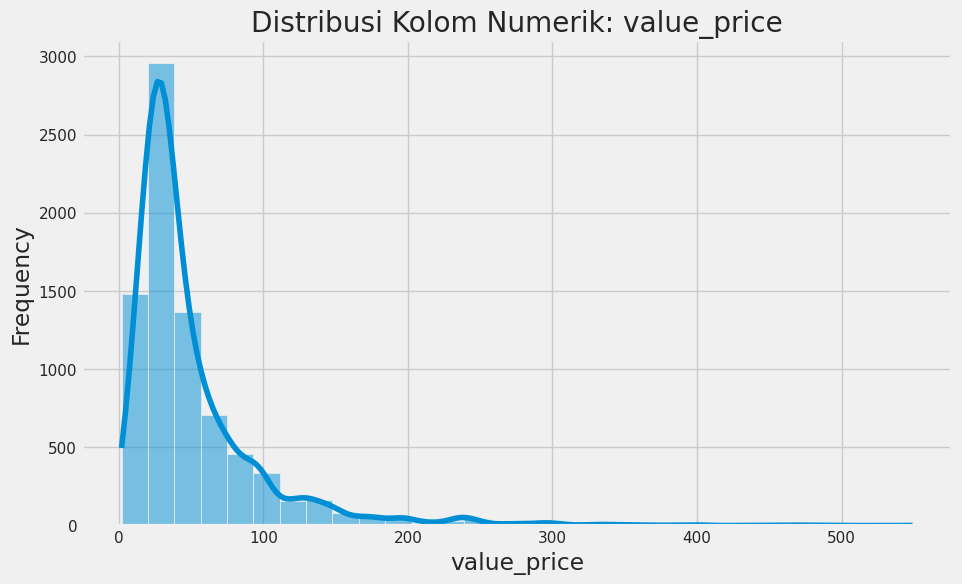

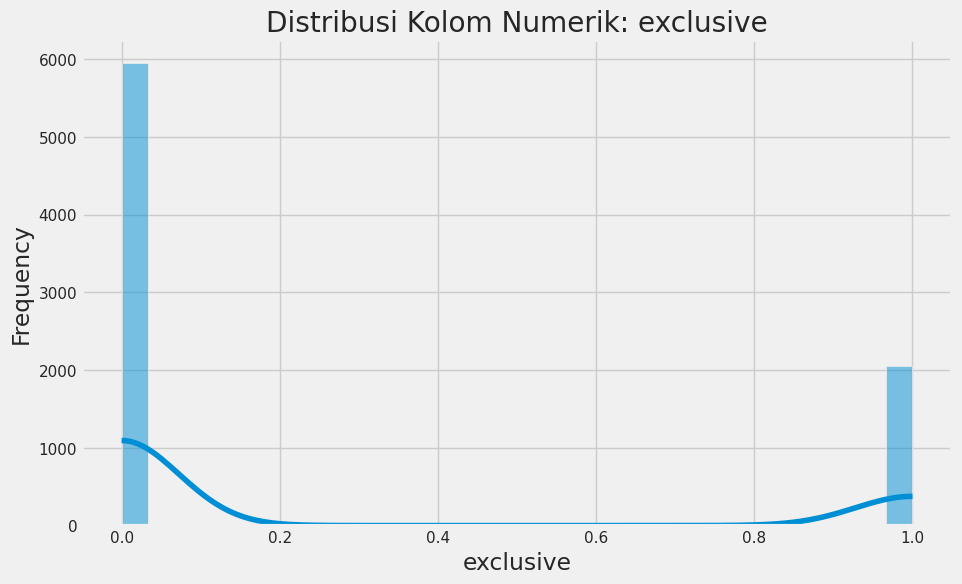

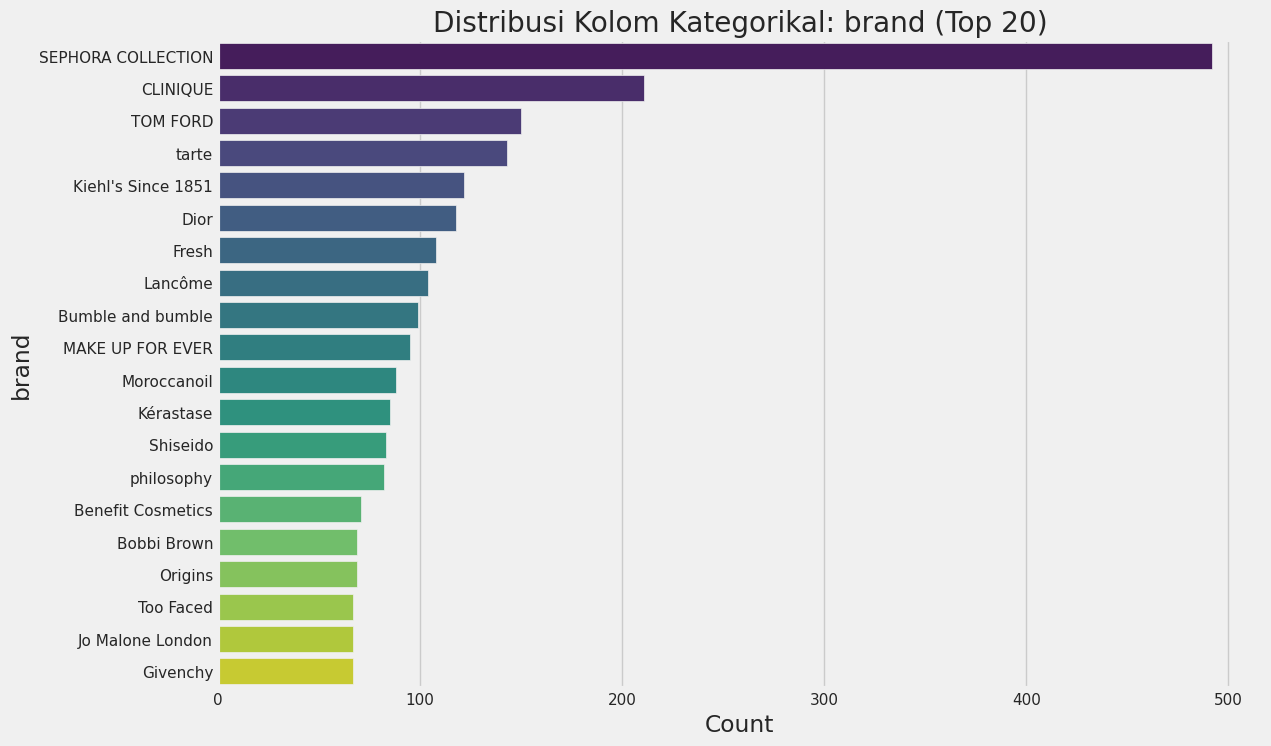

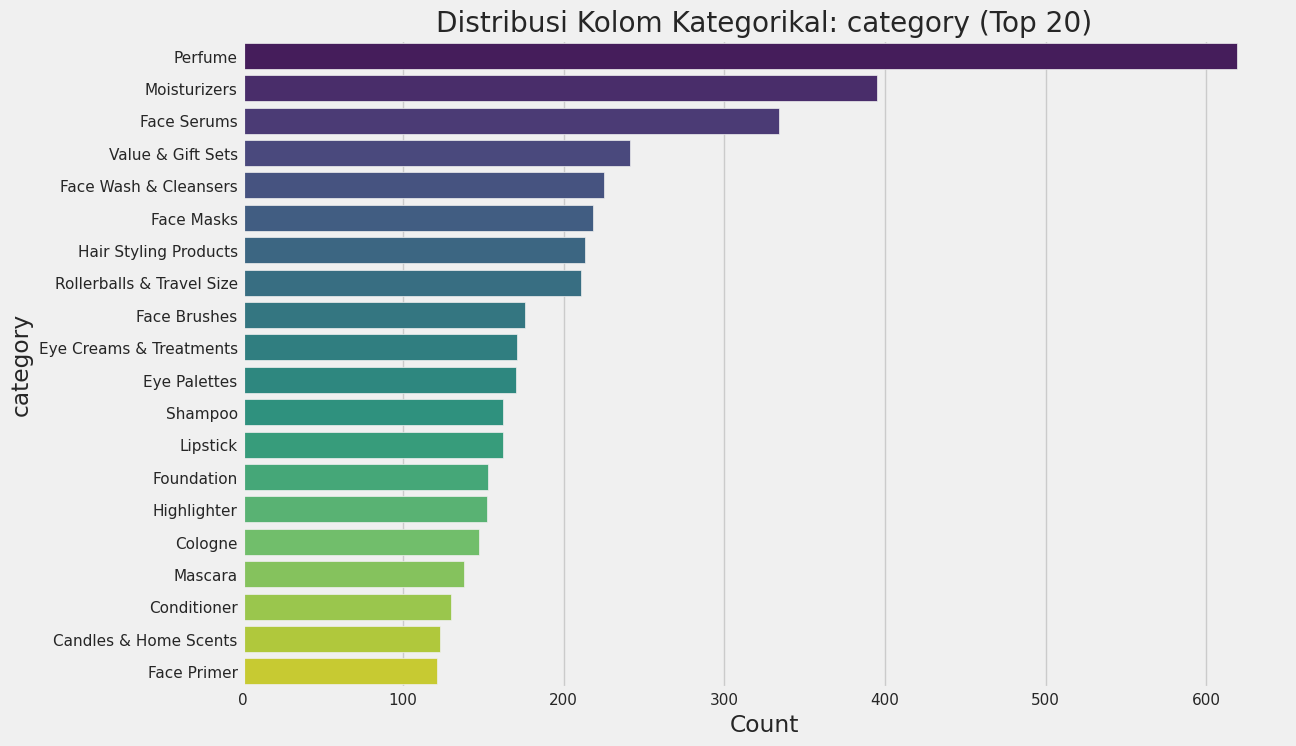

In [11]:
# Visualisasi distribusi untuk kolom numerik
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribusi Kolom Numerik: {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Visualisasi distribusi untuk kolom kategorikal
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    plt.figure(figsize=(12, 8))

    # Menampilkan hanya 20 kategori teratas (sesuaikan jumlah sesuai kebutuhan)
    top_categories = df[col].value_counts().nlargest(20)

    # Grafik batang horizontal
    sns.barplot(y=top_categories.index, x=top_categories.values, palette="viridis")

    plt.title(f'Distribusi Kolom Kategorikal: {col} (Top 20)')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

Berikut ini adalah observasi terhadap distribusi masing-masing kolom berdasarkan visualisasi di atas:

#Kategori (category):
Distribusi kategori produk menunjukkan bahwa "Perfume" mendominasi, diikuti oleh "Moisturizers", "Face Serums", dan kategori lainnya. Distribusi brand sangat skewed ke kiri, dengan beberapa brand yang memiliki frekuensi tinggi sementara sebagian besar brand memiliki frekuensi yang jauh lebih rendah. saat pre processing ada banyak kategori, yang mungkin perlu disederhanakan atau dikelompokkan agar lebih mudah dianalisis, terutama jika beberapa kategori memiliki sedikit data.

#Brand:
Distribusi untuk kolom brand juga menunjukkan adanya brand yang mendominasi, seperti "SEPHORA COLLECTION", "CLINIQUE", dan "TOM FORD". Distribusi kategori juga skewed ke kiri, di mana kategori "Perfume" memiliki frekuensi tertinggi diikuti oleh kategori lain yang lebih jarang muncul. Saat data Pre Processing, mungkin perlu memfokuskan analisis pada brand-brand populer atau mengelompokkan brand dengan jumlah data yang lebih sedikit.

#Exclusive:
Kolom ini sepertinya merupakan variabel biner (0 dan 1) yang menunjukkan apakah suatu produk eksklusif atau tidak. Nilai 0 mendominasi, yang berarti sebagian besar produk tidak eksklusif. Kolom ini adalah variabel biner (0 dan 1), sehingga tidak ada skewness dalam arti tradisional. Namun, ada ketidakseimbangan karena sebagian besar nilai adalah 0 (produk non-eksklusif), dan hanya sebagian kecil adalah 1 (produk eksklusif). Tidak ada outlier karena ini adalah variabel biner.

#Value Price dan Price:
Distribusi harga pada kedua kolom ini menunjukkan skewed distribution yang berat di sebelah kiri, dengan sebagian besar produk memiliki harga rendah. Ada beberapa outlier di sisi harga tinggi. Saat pre-processing, mungkin perlu melakukan normalisasi atau transformasi log agar distribusi lebih normal untuk keperluan analisis atau modeling. Distribusi sangat skewed ke kanan(miring ke kanan), dengan sebagian besar nilai berada di rentang yang rendah (0–100). Harga yang tinggi bisa dianggap sebagai outlier. Produk dengan value price yang sangat tinggi mungkin merupakan produk premium atau paket dengan harga lebih mahal. Produk-produk dengan harga tinggi mungkin memerlukan analisis khusus karena mereka berbeda dari mayoritas. Sama dengan kolom value price, transformasi log atau winsorizing bisa membantu menangani distribusi yang sangat skewed dan outlier

#Love:
Distribusi untuk kolom ini sangat skewed ke kanan, dengan sebagian besar nilai "love" di angka rendah, tetapi ada beberapa outlier yang sangat tinggi. Nilai yang tinggi ini mungkin bisa dipertimbangkan untuk diatasi (misalnya, dengan winsorizing) jika menyebabkan ketidakseimbangan dalam analisis. Sama seperti number of reviews ada beberapa produk yang memiliki love tinggi. Produk dengan nilai love yang sangat tinggi bisa dianggap sebagai outlier, yang mungkin adalah produk populer atau tren.

#Number of Reviews:
Seperti kolom love, distribusi jumlah ulasan juga sangat skewed ke kanan dengan sebagian besar produk memiliki sedikit ulasan, tetapi ada produk tertentu yang memiliki ulasan sangat banyak. Ini juga menunjukkan kemungkinan adanya outlier.Produk dengan jumlah ulasan yang sangat tinggi dapat dianggap sebagai outlier, dan ini mungkin menandakan produk yang sangat populer.

#Rating:
Distribusi rating terlihat bimodal, dengan puncak utama sekitar nilai 4 dan 5. Ini menunjukkan bahwa sebagian besar produk memiliki rating yang sangat baik, namun ada juga yang memiliki rating rendah. Mungkin tidak diperlukan tindakan khusus untuk pre-processing pada kolom ini. Tidak ada outlier yang jelas, namun ada beberapa produk dengan rating sangat rendah di sekitar nilai 1.

#ID:
Kolom ini menunjukkan identitas unik untuk produk dan sepertinya tidak memiliki pola distribusi yang perlu diperhatikan.

#Tindakan untuk Pre-processing:

Grouping: Pengelompokan kategori dan brand yang jumlah datanya sedikit untuk memperkecil variasi yang terlalu banyak.

Handling Outliers: Kolom price, value_price, love, dan number_of_reviews memiliki outlier yang mungkin perlu ditangani untuk mengurangi skewness.

Normalization/Transformation: Kolom numerik yang sangat skewed mungkin bisa dinormalisasi atau ditransformasi (misalnya, log transform) untuk membuat distribusi lebih normal.

Focus on Popular Categories/Brands: Untuk efisiensi, bisa fokus pada produk di kategori atau brand populer.

Merging : Karena Distribusi dan konten data yang serupa Value_price dan Price bisa di merge untuk mengurang redundansi data

### Multivariate Analysis (15 Poin)

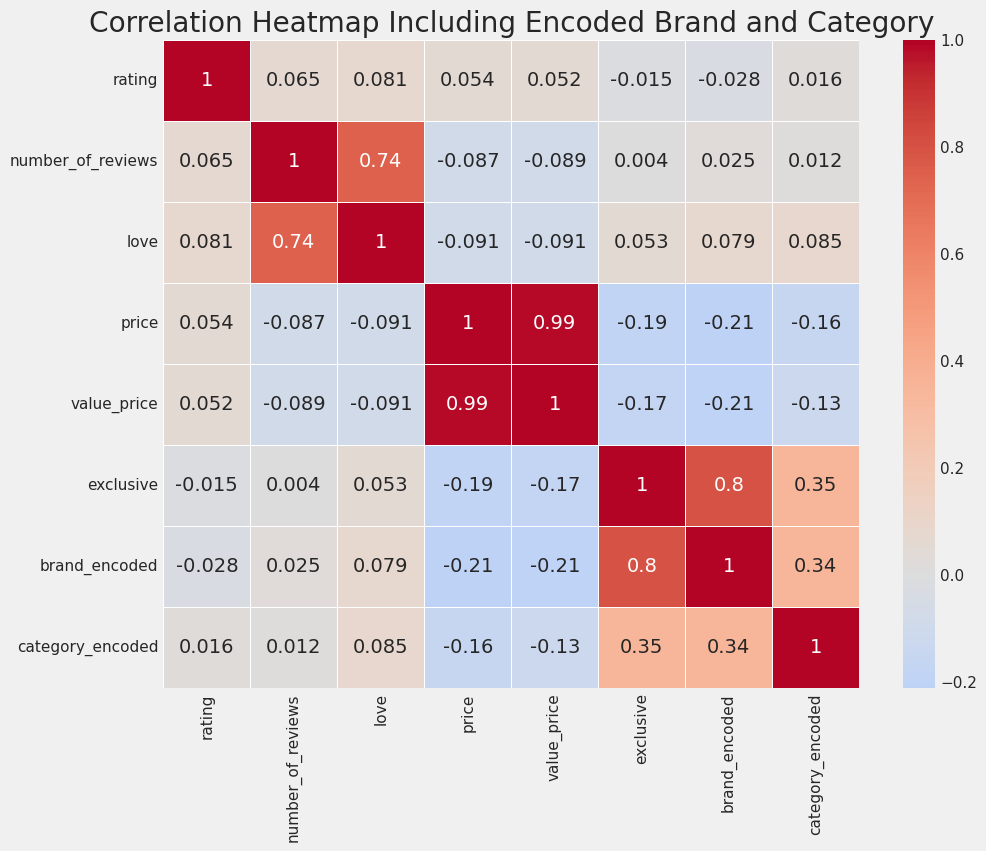

In [12]:
from sklearn.preprocessing import LabelEncoder

# Target encoding for categorical columns: brand and category
# Replace NaN in category with a placeholder for consistent encoding
df['category'].fillna('Unknown', inplace=True)

# Calculate target-encoded values (mean of exclusive for each category in brand and category)
brand_target_encoded = df.groupby('brand')['exclusive'].transform('mean')
category_target_encoded = df.groupby('category')['exclusive'].transform('mean')

# Add encoded columns to the dataset
df['brand_encoded'] = brand_target_encoded
df['category_encoded'] = category_target_encoded

# Prepare numerical data for correlation heatmap
numeric_data_with_encoded = df[['rating', 'number_of_reviews', 'love', 'price', 'value_price', 'exclusive', 'brand_encoded', 'category_encoded']].dropna()

# Recalculate correlation matrix including encoded categorical columns
correlation_matrix_with_encoded = numeric_data_with_encoded.corr()

# Plot updated correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_with_encoded, annot=True, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Correlation Heatmap Including Encoded Brand and Category")
plt.show()


#A. Korelasi antara Masing-Masing Fitur dan Label


# Korelasi dengan rating:

- number_of_reviews: Korelasi positif sangat lemah / Tidak Ada Korelasi (0.065) menunjukkan ada korelasi lemah bahwa produk dengan lebih banyak ulasan tidak berarti akan memiliki rating yang tinggi

- love: Korelasi positif sangat lemah/ Tidak Ada Korelasi (0.081) menunjukkan bahwa produk yang banyak disukai belum tentu akan memiliki rating tinggi

- price dan value_price: (0.054) Tidak ada korelasi signifikan dengan rating, menunjukkan bahwa harga tidak mempengaruhi rating produk.

- Rating tidak memiliki korelasi signifikan dengan fitur lain

#Korelasi dengan number_of_reviews:

- love: Korelasi positif (0.74) yang kuat, menunjukkan bahwa produk yang disukai cenderung memiliki lebih banyak ulasan. Ini adalah hubungan yang penting dan relevan.

- rating: Korelasi positif yang lebih rendah (0.065), menandakan bahwa ulasan banyak tidak selalu berkorelasi dengan rating tinggi.

- Tidak ada korelasi signifikan lain selain dengan love

#Korelasi dengan love:

- number_of_reviews: Korelasi positif tinggi (0.74) menunjukkan bahwa produk yang sangat disukai bisa memiliki banyak ulasan.

- rating: Korelasi positif (0.081) menunjukkan bahwa produk yang lebih disukai tidak berarti akan mendapatkan rating tinggi.

- Tidak ada korelasi signifikan lain selain dengan number_of_reviews

# Korelasi dengan price dan value_price:

- Keduanya memiliki korelasi sangat tinggi (0.99), menunjukkan bahwa harga dan nilai harga hampir identik dan salah satu dapat dihapus.

- Keduanya memiliki korelasi negatif yang lemah dengan exclusive (-0.19 untuk price dan -0.17 untuk value_price), menunjukkan produk eksklusif mungkin sedikit lebih murah, tetapi ini tidak signifikan.

- Brand memiliki korelasi negatif lemah (-0.21 untuk keduanya) menunjukkan bahwa harga untuk beberapa nama brand ternama mungkin sedikit lebih murah dan bukan lebih mahal tetapi ini tidak terlalu signifikan untuk dijadikan korelasi utama

- Category juga memiliki korelasi negatif lemah (-0.16 untuk price dan -0.13 untuk value price) menunjukkan bahwa beberapa kategori mungkin sedikit lebih murah tetapi ini tidak terlalu signifikan untuk dijadikan korelasi penentu


#Korelasi dengan exclusive:

- brand_encoded: Korelasi positif tinggi (0.80) menunjukkan bahwa nama brand cenderung membuat sebuah produk eksklusif

- category_encoded: Korelasi positif sedang (0.35) menunjukkan bahwa kategori produk bisa jadi mempengaruhi ke eksklusifitas sebuah produk

- love dan rating tidak memiliki korelasi yang signifikan dengan exclusive.

#Korelasi dengan brand_encoded:

- Brand_encoded memiliki korelasi positif tinggi dengan exclusive (0.80), yang berarti bahwa merek tertentu cenderung lebih terkait dengan eksklusivitas. Ini menunjukkan bahwa fitur brand sangat relevan dalam menentukan eksklusivitas produk dan harus dipertahankan.

- Brand_encoded memiliki korelasi sedang (0.34), menunjukkan bahwa ada beberapa keterkaitan antara merek dan kategori produk yang bisa relevan dalam analisis, namun tidak cukup kuat untuk menyebabkan redundansi.

#Korelasi dengan category_encoded:

- Category_encoded juga memiliki korelasi positif dengan exclusive (0.35), meskipun tidak sekuat brand_encoded. Ini menunjukkan bahwa kategori produk mungkin relevan untuk menentukan eksklusivitas sebuah produk.

- Brand_encoded memiliki korelasi sedang (0.34), menunjukkan bahwa ada beberapa keterkaitan antara brand dan kategori produk contohnya beberapa brand berfokus lebih banyak memiliki produk di kategori tertentu, namun tidak cukup kuat untuk menyebabkan redundansi.


#Fitur yang paling relevan dan harus dipertahankan:

- brand_encoded: Sangat relevan dengan eksklusivitas.

- category_encoded: Relevan meskipun tidak sekuat brand_encoded.

- number_of_reviews dan love: mereka memiliki hubungan kuat satu sama lain yang menunjukkan bahwa popularitas dan penilaian produk saling terkait.

#B. Korelasi Antar-Fitur

- Price dan value_price: Korelasi sangat tinggi (0.99) menunjukkan bahwa mereka memberikan informasi yang hampir sama. Salah satu dari keduanya harus dihapus untuk mengurangi redundansi.

- number_of_reviews dan love: Korelasi positif tinggi (0.74) menunjukkan bahwa produk yang banyak disukai juga cenderung memiliki banyak ulasan. Hal ini bisa memberikan informasi yang lebih baik dalam analisis produk lebih baik kedua fitur ini disimpan.

- brand_encoded dan category_encoded: Korelasi sedang (0.34) menunjukkan bahwa ada hubungan korelasi sedang antara kategori dan merek. Ini bisa berarti bahwa merek tertentu mungkin lebih sering muncul dalam kategori tertentu.

- Brand_encoded dan exclusive: Korelasi Sangat Kuat (0.80), menunjukkan bahwa nama brand sangat relevan dalam menentukan apakah produk sebuah produk eksklusif atau bukan. Kedua fitur ini sangat dianjurkan untuk disimpan

- Category_encoded dan exclusive (0.35): meskipun tidak serelevan brand_encoded. Ini menunjukkan bahwa beberapa kategori produk mungkin relevan untuk menentukan eksklusivitas sebuah produk.

- Ada pola menarik antar korelasi dengan Category, Brand dan Exclusive yang mungkin saja menunjukkan bahwa brand dan category mungkin menentukan apakah sebuah produk eksklusif atau non eksklusif

- Category_encoded dan Brand_encoded dianjurkan untuk disimpan karena mempunyai korelasi dengan exclusive dan dengan satu sama lain selain itu fitur ini merupakan identias produk


# Tindakan yang Direkomendasikan:

- Hapus Salah Satu dari price atau value_price: karena keduanya serupa dengan korelasi 0.99

- Pertahankan number_of_reviews dan love: Keduanya memberikan informasi berharga tentang popularitas produk dan ulasan pelanggan.

- Pertimbangkan untuk Mempertahankan Kategori dan Merek: Dengan mengingat hasil korelasi, kedua fitur ini berpotensi memberikan wawasan tentang eksklusivitas produk.

# Data Preparation (40 Poin)

## Missing Value

In [13]:
import pandas as pd

# Assuming your data is in a CSV file named 'your_data.csv'
df = pd.read_csv('/content/drive/MyDrive/Big data 1/Product_Exclusive_Classification.csv')

# Mengecek missing values di setiap kolom
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

# Menangani missing values jika ada
if missing_values.any():
    # Mengisi nilai kosong untuk kolom numerik
    num_cols = ['price', 'number_of_reviews', 'rating','price','value_price','love']
    for col in num_cols:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].median(), inplace=True)
            print(f"Missing values in '{col}' filled with median.")

    # Mengisi nilai kosong untuk kolom kategorikal
    cat_cols = ['brand', 'category']
    for col in cat_cols:
        if df[col].isnull().sum() > 0:
            if col == 'brand':
                df[col].fillna(df[col].mode()[0], inplace=True)
                print(f"Missing values in '{col}' filled with mode.")
            else:
                df[col].fillna('Unknown', inplace=True)
                print(f"Missing values in '{col}' filled with 'Unknown'.")
else:
    print("No missing values found.")


Missing values per column:
 id                    0
brand                 0
category             13
rating               95
number_of_reviews     9
love                 34
price                 8
value_price          17
exclusive             0
dtype: int64
Missing values in 'price' filled with median.
Missing values in 'number_of_reviews' filled with median.
Missing values in 'rating' filled with median.
Missing values in 'value_price' filled with median.
Missing values in 'love' filled with median.
Missing values in 'category' filled with 'Unknown'.


Cek missing values pada setiap kolom, kemudian menggunakan metode imputasi atau mengganti data yang missing dengan nilai median untuk kolom numerik dan value dominan untuk kolom kategorikal/non-numerik. Jika ada kolom kategorikal yang tidak memiliki nilai dominan yang jelas, nilai kosong diisi dengan kategori "Unknown".

## Duplicate Values


In [14]:
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

# Menghapus data duplikat jika ada
if duplicates > 0:
    data = df.drop_duplicates()
    print("Duplicate rows removed.")
else:
    print("No duplicate rows found.")

Number of duplicate rows: 0
No duplicate rows found.


Tidak perlu di handle karena tidak ada data duplikat

## Handle Outliers

In [26]:
# Fungsi untuk mendeteksi dan menghapus outliers menggunakan IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    if not outliers.empty:
        print(f"Outliers detected in '{column}':", len(outliers))
        return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    else:
        print(f"No outliers detected in '{column}'.")
        return df

# Memastikan hanya kolom dengan outliers yang di-handle
df = remove_outliers(df, 'price')
df = remove_outliers(df, 'number_of_reviews')
df = remove_outliers(df, 'love')
df = remove_outliers(df, 'value_price')
df = remove_outliers(df, 'rating')
df = remove_outliers(df, 'exclusive')


No outliers detected in 'price'.
No outliers detected in 'number_of_reviews'.
No outliers detected in 'love'.
No outliers detected in 'value_price'.
No outliers detected in 'rating'.
No outliers detected in 'exclusive'.


 Mengidentifikasi outliers pada kolom numerik menggunakan metode Interquartile Range (IQR) yaitu ukuran penyebaran data yang mengabaikan nilai ekstrim. Jika ditemukan nilai yang berada di luar batas IQR, nilai tersebut dihapus dari dataset.

 Cara ini diulang terus menerus sampai tidak ada lagi outlier karena itu output menunjukkan "No outliers detected in..."

## Feature Transformation

In [27]:
import numpy as np

# Tentukan threshold untuk skewness
high_skew_threshold = 1
moderate_skew_threshold = 0.5


# Daftar kolom yang akan dikecualikan dari pengecekan
excluded_columns = ['id', 'exclusive_log', 'id_log_log','id_log','exclusive_log_log','exclusive_log_log_log', 'exclusive_log_log_log_log']

# Loop melalui kolom numerik di DataFrame, kecuali kolom yang dikecualikan
for col in df.select_dtypes(include=np.number).columns:
    if col not in excluded_columns:
        # Hitung skewness kolom
        skewness = df[col].skew()
        print(f"Skewness of '{col}': {skewness}")

        # Terapkan transformasi sesuai dengan tingkat skewness
        if abs(skewness) > high_skew_threshold:
            # Skewness tinggi, gunakan transformasi log
            df[f'{col}_log'] = np.log1p(df[col])
            print(f"Applied log transformation to '{col}'.")
        elif abs(skewness) > moderate_skew_threshold:
            # Skewness sedang, gunakan transformasi akar kuadrat atau akar kubik
            df[f'{col}_sqrt'] = np.sqrt(df[col])
            print(f"Applied square root transformation to '{col}'.")

Skewness of 'rating': 0.04624594180016424
Skewness of 'number_of_reviews': 0.9490536457328569
Applied square root transformation to 'number_of_reviews'.
Skewness of 'love': 0.7844861888197289
Applied square root transformation to 'love'.
Skewness of 'price': 0.660921552705658
Applied square root transformation to 'price'.
Skewness of 'value_price': 0.6322656023728316
Applied square root transformation to 'value_price'.
Skewness of 'exclusive': 1.0518806526185684
Applied log transformation to 'exclusive'.


#Pengecekan Skewness:

mengecek skewness dari setiap kolom numerik dalam DataFrame untuk menentukan tingkat simetri distribusinya. Skewness dihitung menggunakan metode .skew() pada setiap kolom numerik.

Jika skewness mendekati 0, distribusi dianggap simetris; jika skewness lebih besar dari 1 atau lebih rendah dari -1 distribusi sangat skew.

#Threshold Skewness:

Dua threshold ditetapkan untuk menentukan tindakan yang akan diambil:
- High skew threshold: Jika skewness absolutnya lebih besar dari 1, distribusi dianggap sangat skew.

- Moderate skew threshold: Jika skewness absolutnya antara 0.5 dan 1, distribusi dianggap sedikit skew.

Threshold ini digunakan sebagai panduan untuk menerapkan transformasi yang sesuai.

#Pengecualian Kolom:

Kolom tertentu, seperti id dan exclusive_log, dikecualikan dari pengecekan dan transformasi skewness.

Pengecualian ini dilakukan agar kolom yang tidak relevan atau sudah ditransformasi sebelumnya tidak diproses ulang.

#Transformasi Berdasarkan Skewness:

- Skewness tinggi (|skewness| > 1): Kolom yang memiliki skewness tinggi diterapkan transformasi log menggunakan np.log1p(). Metode ini mengurangi skewness secara signifikan, sehingga distribusi menjadi lebih simetris.

- Skewness sedang (0.5 < |skewness| ≤ 1): Kolom dengan skewness sedang diterapkan transformasi akar kuadrat (np.sqrt()), yang merupakan transformasi lebih ringan dibandingkan log. Ini mengurangi skewness tanpa mengubah distribusi secara drastis.

- Skewness rendah (|skewness| ≤ 0.5): Kolom yang sudah cukup simetris (skewness rendah) tidak diterapkan transformasi tambahan, karena distribusinya sudah cukup baik untuk analisis.
Penyimpanan Hasil Transformasi:

Kolom yang ditransformasi diberi nama baru, seperti <column>_log untuk log transform atau <column>_sqrt untuk square root transform. Ini memungkinkan untuk membandingkan antara data asli dan data yang telah ditransformasi.

#Metode Transformasi

- Log Transform (np.log1p()): Digunakan untuk mengurangi skewness tinggi pada kolom dengan skewness lebih besar dari 1. Metode ini efektif dalam menangani skewness yang ekstrem.

- Square Root Transform (np.sqrt()): Digunakan untuk mengurangi skewness sedang pada kolom dengan skewness antara 0.5 dan 1. Transformasi ini lebih ringan dibandingkan log, sehingga cocok untuk distribusi yang sedikit skew.

## Feature encoding

In [28]:
# Mengecek tipe data kategorikal
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)

# Lakukan target encoding untuk kolom 'brand' dan 'category' jika mereka ada
if 'brand' in categorical_cols:
    df['brand_encoded'] = df.groupby('brand')['exclusive'].transform('mean')
    print("Encoded 'brand' with target encoding.")

if 'category' in categorical_cols:
    df['category_encoded'] = df.groupby('category')['exclusive'].transform('mean')
    print("Encoded 'category' with target encoding.")

# Drop kolom asli setelah encoding jika sudah tidak dibutuhkan
df = df.drop(columns=['brand', 'category'])

Categorical columns: Index(['brand', 'category'], dtype='object')
Encoded 'brand' with target encoding.
Encoded 'category' with target encoding.


Mengonversi kolom kategorikal brand dan category menggunakan **target encoding** untuk menyederhanakan representasi kolom dan menambah relevansi informasi. Target encoding dilakukan berdasarkan rata-rata nilai label (exclusive) pada setiap kategori.

**Hasil:**

Kolom brand dan category dikonversi menjadi nilai rata-rata eksklusivitas masing-masing kategori. Hal ini membantu mengurangi dimensi data dan membuat fitur ini lebih informatif dalam proses modeling.

Setelah encoding, kolom asli brand dan category dihapus untuk menghindari redundansi.

## Class imbalance

In [34]:
# Mengecek distribusi kelas pada label
class_distribution = df['exclusive'].value_counts()
print("Class distribution before handling imbalance:\n", class_distribution)

# Menggunakan SMOTE jika ada ketidakseimbangan kelas
if class_distribution.min() / class_distribution.max() < 0.5:
    from imblearn.over_sampling import SMOTE
    from sklearn.model_selection import train_test_split

    # Pisahkan fitur dan label
    X = df.drop(columns=['exclusive'])
    y = df['exclusive']

    # Split data sebelum melakukan SMOTE
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Menggunakan SMOTE untuk oversample data training
    smote = SMOTE(random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

    print("Class distribution after SMOTE:\n", y_train_res.value_counts())
else:
    print("No class imbalance detected.")

Class distribution before handling imbalance:
 exclusive
0    2143
1     782
Name: count, dtype: int64
Class distribution after SMOTE:
 exclusive
0    1715
1    1715
Name: count, dtype: int64


**Metode:** Mengecek distribusi kelas pada label exclusive. Jika distribusi kelas tidak seimbang, digunakan SMOTE (Synthetic Minority Over-sampling Technique) untuk menyeimbangkan data training.

Penanganan ketidakseimbangan kelas umumnya dilakukan pada kolom target (label) atau fitur kategorikal yang mewakili kelas atau kategori tertentu.

#Numerik vs. Kategorikal dalam Resampling:

- **Kategorikal**: Ketidakseimbangan kelas terjadi ketika satu atau beberapa kategori jauh lebih sedikit dibandingkan kategori lainnya, sehingga teknik resampling seperti SMOTE (yang menciptakan sampel sintetis dari kelas minoritas) efektif untuk membuat distribusi lebih seimbang.

- **Numerikal**: Kolom numerikal biasanya tidak mewakili kelas tertentu, melainkan memiliki nilai kontinu (contohnya harga, skor, atau jumlah). Resampling pada data numerik dengan SMOTE atau metode serupa bisa menyebabkan data menjadi kurang bermakna karena SMOTE akan "mengira" nilai yang berbeda sebagai kelas berbeda, yang tidak sesuai dengan makna numerikalnya.

oleh karena itu kolom brand dan category yang sudah di-encode menjadi numerik, biasanya tidak perlu lagi melakukan class imbalance handling pada kolom-kolom tersebut.

Hasil:

Terdapat ketidakseimbangan kelas pada label exclusive. Menggunakan SMOTE pada data training berhasil menyeimbangkan jumlah sampel antara kedua kelas.
Penyeimbangan kelas diharapkan dapat meningkatkan performa model, terutama dalam menghindari bias terhadap kelas mayoritas.


# Feature Engineering (30 poin)



In [ ]:
# Import libraries
import pandas as pd

# Drop 'value_price' due to redundancy with 'price'
df = df.drop(columns=['value_price'])


#Hapus Salah Satu dari price atau value_price:

Alasan: Keduanya memiliki korelasi hampir sempurna (0.99), menunjukkan bahwa mereka memberikan informasi yang sangat mirip. Untuk mengurangi redundansi, kita akan menghapus salah satu.

In [ ]:
# Mengisi nilai NaN pada 'number_of_reviews' untuk menghindari pembagian nol
df['number_of_reviews'] = df['number_of_reviews'].replace(0, 1)

# 1. Average Rating per Review
# Hitung rata-rata rating per ulasan untuk setiap produk
df['avg_rating_per_review'] = df['rating'] / df['number_of_reviews']

# 2. Love-to-Review Ratio
# Hitung rasio "love" terhadap jumlah ulasan
df['love_to_review_ratio'] = df['love'] / df['number_of_reviews']

# 3. Price per Category Mean
# Hitung rata-rata harga per kategori
category_price_mean = df.groupby('category_encoded')['price'].transform('mean')
# Buat fitur baru dengan selisih harga produk terhadap rata-rata harga di kategorinya
df['price_vs_category_mean'] = df['price'] - category_price_mean

# 4. Brand Exclusivity Score
# Hitung skor eksklusivitas per brand berdasarkan rata-rata nilai 'exclusive'
brand_exclusivity_score = df.groupby('brand_encoded')['exclusive'].transform('mean')
df['brand_exclusivity_score'] = brand_exclusivity_score

# Cek hasilnya
df[['avg_rating_per_review', 'love_to_review_ratio', 'price_vs_category_mean', 'brand_exclusivity_score']].head()


,avg_rating_per_review,love_to_review_ratio,price_vs_category_mean,brand_exclusivity_score
0,0.108696,0.000000,25.000000,0.950980
23,0.160714,46.428571,-22.840226,0.065789
24,0.095745,117.021277,-22.840226,0.065789
25,0.142857,107.142857,36.159774,0.000000
27,0.128571,22.542857,-5.800000,0.065789


#Average Rating per Review:

- Deskripsi: Membuat fitur baru dengan membagi rating dengan number_of_reviews. Fitur ini akan menunjukkan seberapa baik produk dinilai per ulasan yang diterima.

- Tujuan: Untuk menilai apakah produk yang populer (banyak ulasan) juga memiliki penilaian rata-rata yang baik.

#Love-to-Review Ratio:

- Deskripsi: Membuat fitur dengan membagi love dengan number_of_reviews. Fitur ini akan menunjukkan rasio antara jumlah "love" dengan jumlah ulasan, yang mengindikasikan tingkat popularitas terhadap keterlibatan.

- Tujuan: Ini dapat membantu menilai apakah produk yang disukai juga mendapatkan banyak ulasan, atau sebaliknya.

#Price per Category Mean:

- Deskripsi: Menghitung rata-rata price untuk setiap kategori produk, lalu membuat fitur yang menunjukkan selisih antara price produk dan rata-rata harga kategori. Jika price_vs_category_mean bernilai negatif, artinya produk tersebut lebih murah dibandingkan dengan produk lain dalam kategori yang sama. dan sebaliknya jika positif

- Tujuan: Ini dapat membantu mengidentifikasi apakah produk lebih mahal atau lebih murah dari rata-rata harga di kategorinya, yang mungkin berpengaruh pada eksklusivitas.

#Brand Exclusivity Score:

- Deskripsi: Membuat skor berdasarkan rata-rata exclusive untuk setiap merek, yang menunjukkan seberapa eksklusif sebuah merek dibandingkan dengan merek lain.

- Skor yang tinggi menunjukkan bahwa merek tersebut memiliki nilai eksklusivitas yang lebih tinggi, yang dapat berarti produk-produk dari merek itu dianggap lebih premium atau memiliki nilai yang lebih tinggi di mata konsumen.

- Sebaliknya, skor yang rendah menunjukkan bahwa merek tersebut mungkin dianggap kurang eksklusif. Ini bisa terjadi jika produk dari merek tersebut lebih umum, kurang inovatif, atau lebih terjangkau.

- Tujuan: Membantu menilai kecenderungan eksklusivitas suatu merek dalam dataset.

#C. Ide Feature Tambahan

#Seasonal Popularity:

- Fitur yang menunjukkan popularitas musiman dari produk, misalnya berdasarkan data penjualan selama periode tertentu seperti musim liburan, hari besar, atau musim tertentu.

- Tujuan Fitur: Menilai apakah produk tertentu memiliki peningkatan popularitas di musim atau waktu tertentu, yang dapat membantu memahami relevansi produk dengan periode waktu.

#Customer Loyalty Score:

- Fitur menggunakan data pelanggan untuk menghitung tingkat loyalitas, misalnya berdasarkan jumlah produk yang sering dibeli kembali atau tingkat engagement dari pelanggan yang sama.

- Tujuan Fitur: Menunjukkan bahwa produk dengan tingkat loyalitas tinggi mungkin lebih bernilai bagi konsumen setia.

#Marketing Budget or Advertisement Exposure:

- Fitur yang menunjukkan berapa banyak anggaran yang dikeluarkan untuk iklan produk atau eksposur iklan dari masing-masing merek.

- Tujuan Fitur: Mengukur apakah popularitas atau eksklusivitas suatu produk dipengaruhi oleh strategi pemasaran dan anggaran yang dialokasikan untuk iklan.

#Influencer Endorsements:

- Jumlah atau tingkat endorsement dari influencer terhadap produk tertentu.

- Tujuan Fitur: Mengukur apakah endorsement dari influencer berpengaruh pada eksklusivitas, popularitas, atau penilaian konsumen terhadap produk.